# Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 


<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Submission Details

**Project is due May 16th at 11:59 pm. To submit the project, please save the notebook
as a pdf file and submit the assignment via Gradescope. In addition, make sure that
all figures are legible and suﬀiciently large. For best pdf results, we recommend print the notebook using [$\LaTeX$](https://www.latex-project.org/).**

## Loading Essentials and Helper Functions 

In [3]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import matplotlib
import os
import time
#Sklearn classes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn import metrics
from sklearn.svm import SVC  #SVM classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

from matplotlib import pyplot as plt

%matplotlib inline

#Sets random seed
import random 
random.seed(40) 

# import the provided helper functions
from helper import save_fig, draw_confusion_matrix, heatmap, make_meshgrid, plot_contours   

# TODO: Using classification methods to classify heart disease

Now that you have some examples of the classifiers that Sci-kit learn has to offer, let try to apply them to a new dataset.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. You will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> Male / Female</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>chol:</b> cholesterol in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeak:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## [25 pts] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [4]:
#TODO: Your code goes here
df = pd.read_csv('datasets/heartdisease.csv')

### [5 pts] 1.1 Looking at the data 

Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [ ]:
#TODO: Your code goes here
print(df.head())
print(df.describe())
print(df.info())

   age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    Male   3       145   233    1        0      150      0      2.3   
1   37    Male   2       130   250    0        1      187      0      3.5   
2   41  Female   1       130   204    0        0      172      0      1.4   
3   56    Male   1       120   236    0        1      178      0      0.8   
4   57  Female   0       120   354    0        1      163      1      0.6   

   slope  ca  thal   sick  
0      0   0     1  False  
1      0   0     2  False  
2      2   0     2  False  
3      2   0     2  False  
4      2   0     2  False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null   

**Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Additionally, some numerical features can represent categorical features which need to be pre-processed.  Are there any columns that need to be transformed and why?**

[Use this area to describe any fields you believe will be problemmatic and why] E.g., All the columns in our dataframe are numeric (either int or float), however our target variable 'sick' is a boolean and may need to be modified.

**Answer:** Yes, there are two problematic columns: sex and sick. Sex is a string variable and needs to be encoded numerically, and sick is a boolean and needs to have a numeric correspondence as well. Both variables need to be read by the algorithm as numbers.

**Determine if we're dealing with any null values. If so, report on which columns?**

In [8]:
#TODO: Your code goes here
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
sick        False
dtype: bool

**Answer:** No, we do not have any null values per the code above.

### [5 pts] 1.2 Transform target label into numerical value

Before we begin our analysis, we need to fix the field(s) that will be problematic. Specifically, convert our boolean `sick` and string `sex` variable into binary numeric variables (values of either '0' or '1') using the [label encoder from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), place 'sick' into a new column of the DataFrame named "target", and then drop the original 'sick' column from the dataframe. Afterward, use .head to print the first 10 rows

In [21]:
#TODO: Your code goes here
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['sick'])
df['sex'] = le.fit_transform(df['sex'])
df = df.drop('sick', axis=1)
print(df.head(10))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       0  
1   0     2       0  
2   0     2       0  
3   0     2       0 

### [5 pts] 1.3 Plotting histogram of data

Now that we have a feel for the data-types for each of the variables, plot histograms of each field.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

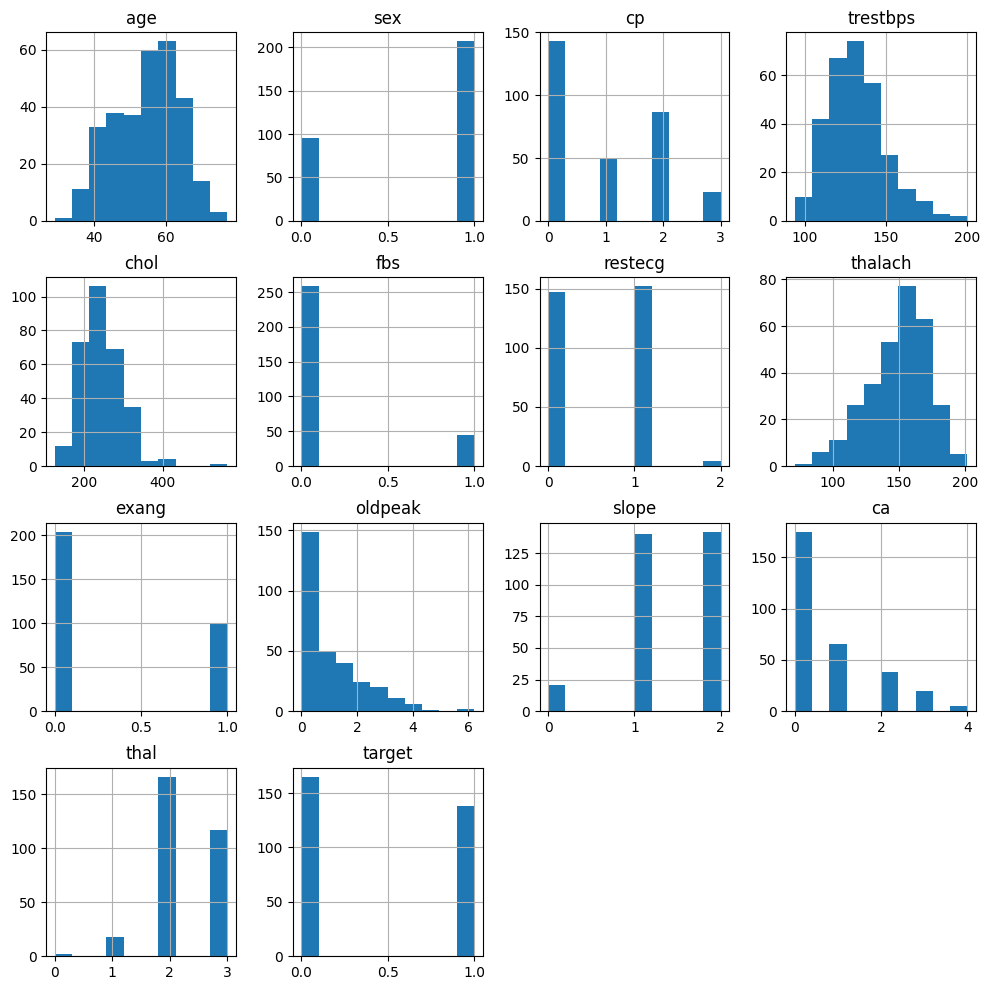

In [25]:
#TODO: Your code goes here
df.hist(figsize=(12,12))

### [5 pts] 1.4 Looking at class balance

We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

target
0    165
1    138
Name: count, dtype: int64

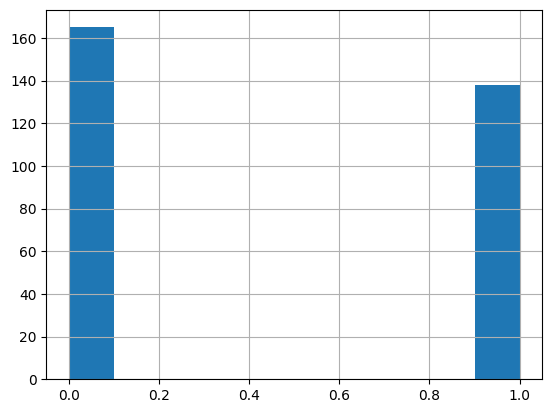

In [27]:
#TODO: Your code goes here
df['target'].hist()
df['target'].value_counts()

**Answer:** The classes are approximately balanced, with not sick having 165 instances and sick having 138 instances.

Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. 

**Discuss some of the problems that might arise by artificially balancing a dataset.**

**Answer:** Arbitrary balancing can still cause over/underfitting depending on the method of balancing. For instance, oversampling may reduce generalizability because the model fixates on a trend that may not actually be present in the data. On the other hand, undersampling removes information and could prevent the model from learning any trend to begin with.

### [5 pts] 1.5 Looking at Data Correlation

Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, use the heatmap function to plot the correlations of the data.

KeyError: (0, 0)

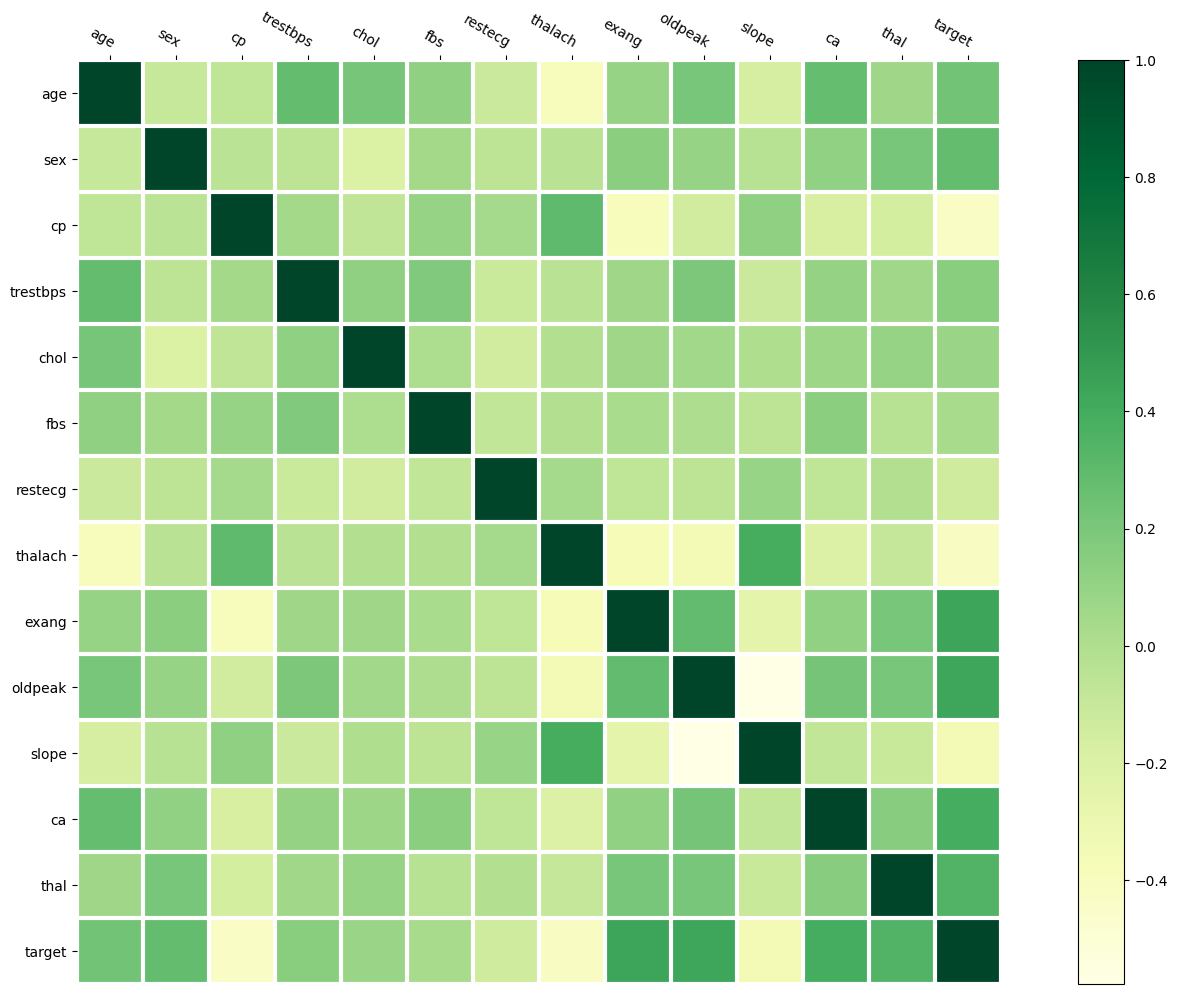

In [38]:
#TODO: Your code goes here
heatmap(df.corr(), row_labels=df.columns, col_labels=df.columns)

Next, show the correlation to the "target" feature only and sort them in descending order.

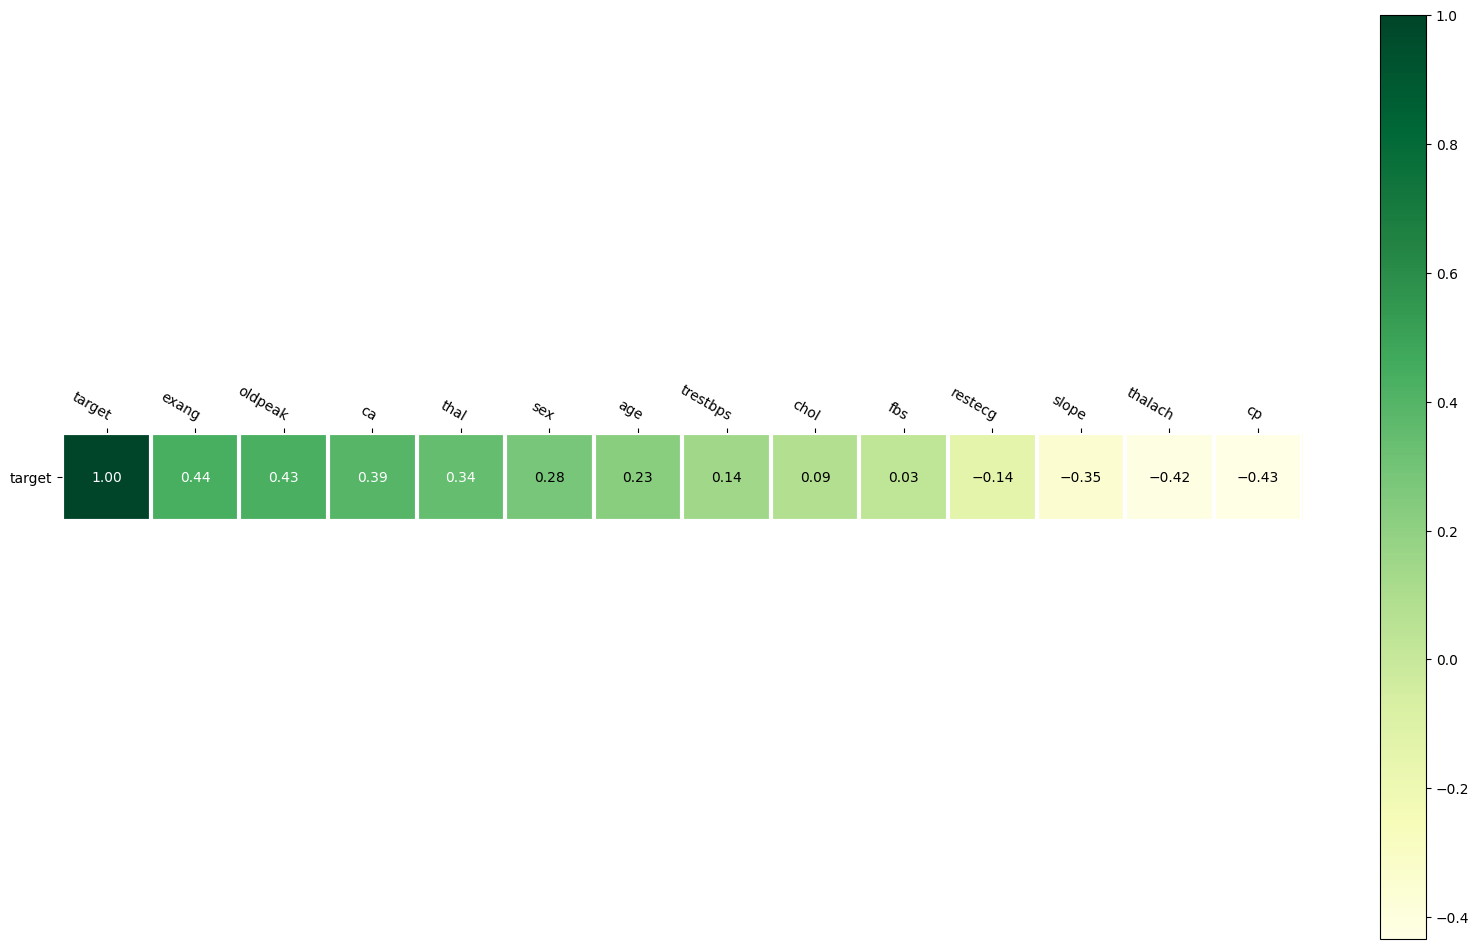

In [52]:
#TODO: Your code goes here
desc_target_corr = df.corr()['target'].sort_values(ascending=False)
heatmap(np.array(desc_target_corr).reshape(1,-1), row_labels=np.array(['target']), col_labels=desc_target_corr.index)

**From the heatmap values and the description of the features, why do you think some variables correlate more highly than others?**  (This question is just to get you thinking and there is no perfect answer since we have no medical background)

**Answer:** Medically relevant data, such as exercise-induced angina, has a higher impact on whether or not a patient has heart disease. A feature like sex still has an impact, but it's not as pertinent as heart-related data. A qualitative metric like cp (chest pain type) has much less impact, likely because it's a subjective measure of pathology and cannot be reliably compared across patients.

## [25 pts] Part 2. Prepare the Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data. The first batch will simply be the raw numeric data that hasn't gone through any additional pre-processing. The second batch will be data that you will pipeline using pre-processing methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### [2 pts] 2.1 Separate target labels from data

Save the label column as a separate array and then make a new dataframe without the target.

In [54]:
#TODO: Your code goes here
labels = df['target']
features = df.drop('target', axis=1)

### [5 pts] 2.2 Balanced Train Test Split

Now, create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 65% of your total dataframe. To ensure that the train and test sets have balanced classes, use the [stratify command of train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Output the resulting shapes of your training and testing samples to confirm that your split was successful. Additionally, output the class counts for the training and testing cohorts to confirm that there is no artifical class imbalance.

Note: Use `randomstate = 0` to ensure that the same train/test split happens everytime for ease of grading.

In [61]:
#TODO: Your code goes here
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.65, random_state=0, stratify=labels)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts(), y_test.value_counts())

(196, 13) (107, 13) (196,) (107,)
target
0    107
1     89
Name: count, dtype: int64 target
0    58
1    49
Name: count, dtype: int64


### [5 pts] 2.3 KNN on raw data 

Now, let's try a classification model on this data. We'll first use KNN since it is the one we are most familiar with. 

One thing we noted in class was that because KNN relies on Euclidean distance, it is highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation, simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. **Report on the test accuracy of the resulting model and plot the confusion matrix.**

Recall that accurracy can be calculated easily using `metrics.accuracy_score` and that we have a helper function to draw the confusion matrix.

In [63]:
#TODO: Your code goes here
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Test Accuracy is ', metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Test Accuracy is  0.6261682242990654


array([[42, 16],
       [24, 25]])

### [5 pts] 2.4 KNN on preprocessed data
Now lets implement a pipeline to preprocess the data. For the pipeline, use `StandardScaler` on the numerical features and one-hot encoding on the categorical features. For reference on how to make a pipeline, please look at project 1.

For reference, the categorical features are `['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca','thal']`.

In [66]:
#TODO: Your code goes here
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
print(features.info())
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
pipeline = ColumnTransformer([
    ('num', StandardScaler(), list(num_features)),
    ('cat', OneHotEncoder(), list(cat_features))
])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB
None


**Now use the pipeline to transform the data and then apply the same KNN classifier with this new training/testing data. Report the test accuraccy. Discuss the implications of the different results you are obtaining.**

Note: Remember to use `fit_transform` on the training data and `transform` on the testing data.

In [73]:
#TODO: Your code goes here
train = pipeline.fit_transform(X_train)
test = pipeline.transform(X_test)
knn = KNeighborsClassifier()
knn.fit(train, y_train)
y_pred_prep = knn.predict(test)
print('Test Accuracy is ', metrics.accuracy_score(y_test, y_pred_prep))

Test Accuracy is  0.7383177570093458


**Answer:** The test accuracy for KNN on preprocessed data is 73.83%, compared to the raw data at 62.62%. This shows that training on raw data is less effective and accurate than with the pipeline. This makes sense because the pipeline encodes data accordingly, allowing for more accurate data manipulation and analysis by the model.

### [8 pts] 2.5 KNN Parameter optimization for `n_neighbors`

The KNN Algorithm includes an `n_neighbors` attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Let's now try n values of: 1, 2, 4, 8, 16, 32, 64, 128. Run your model for each value and report the test accuracy for each.

In [74]:
#TODO: Your code goes here
for k in [1,2,4,8,16,32,64,128]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train, y_train)
    y_pred = knn.predict(test)
    print(f'Test Accuracy for k={k} is ', metrics.accuracy_score(y_test, y_pred))

Test Accuracy for k=1 is  0.7850467289719626
Test Accuracy for k=2 is  0.7663551401869159
Test Accuracy for k=4 is  0.7757009345794392
Test Accuracy for k=8 is  0.7570093457943925
Test Accuracy for k=16 is  0.7850467289719626
Test Accuracy for k=32 is  0.7663551401869159
Test Accuracy for k=64 is  0.7850467289719626
Test Accuracy for k=128 is  0.7663551401869159


**Comment for which value of n did the KNN model perform the best.  Did the model perform strictly better or stricly worse as the value of n increased?**

**Answer:** The model performed more accurately for k=8. The accuracy did not strictly increase or decrease with k, which makes sense because there is a balance on the test data between overfitting and underfitting.

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ Logistic Regression and SVM to improve upon the model and compare the results.

**For the rest of the project, you will only be using the transformed data and not the raw data. DO NOT USE THE RAW DATA ANYMORE**

## [20 pts] Part 3. Additional Learning Methods:  Logistic Regression

Let's now try Logistic Regression. Recall that Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### [5 pts] 3.1 Run the default Logistic Regression

Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model.  Use the default settings. **Report on the test accuracy and plot the confusion matrix.**

In [76]:
#TODO: Your code goes here
logreg = LogisticRegression()
logreg.fit(train, y_train)
y_pred = logreg.predict(test)
print('Test accuracy is ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test accuracy is  0.8504672897196262
[[54  4]
 [12 37]]


### [5 pts] 3.2 Compare Logistic Regression and  KNN
In your own words, describe the key differences between Logistic Regression and KNN? When would you use one over the other?

**Answer:** Logistic regression is a linear classifier, while KNN is non-parametric. As such, I'd use logistic regression when I expect a linear decision boundary, and I'd use KNN when I care more about local structure.

### [5 pts] 3.3 Tweaking the Logistic Regression

**What are some parameters we can change that will affect the performance of Logistic Regression?**

**Answer:** We can change the regularization strength, the max iteration, the type of penalty, etc.

**Implement Logistic Regression with the following specifications, Report the test accuracy and plot the confusion matrix**
- Use `liblinear` solver (A Library for Large Linear Classification)
- L2 penalty (ridge regularization)
- Max iteration = 900
- `C` = 1 (inverse of regularization strength)

In [78]:
#TODO: Your code goes here
new_logreg = LogisticRegression(solver='liblinear', penalty='l2', max_iter=900, C=1)
new_logreg.fit(train, y_train)
y_pred = new_logreg.predict(test)
print('Test accuracy is ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test accuracy is  0.8504672897196262
[[54  4]
 [12 37]]


**Now, Implement the same regression with `c=0.001`. Report on the test accuracy and plot the confusion matrix.**

In [79]:
#TODO: Your code goes here
newer_logreg = LogisticRegression(solver='liblinear', penalty='l2', max_iter=900, C=.001)
newer_logreg.fit(train, y_train)
y_pred = newer_logreg.predict(test)
print('Test accuracy is ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test accuracy is  0.7663551401869159
[[53  5]
 [20 29]]


**Did the accuraccy drop or improve? Why?**

**Answer:** The accuracy dropped because we increased the regularization strength (1/c) quite dramatically, and the regularization thus became suboptimal for the data.

### [5 pts] 3.4 Trying out different penalties

**Now, implement Logistic Regression with the following specifications, Report the test accuracy and plot the confusion matrix**
- Use `liblinear` solver (A Library for Large Linear Classification)
- L1 penalty (LASSO regularization)
- Max iteration = 900
- `C` = 1 (inverse of regularization strength)

In [80]:
#TODO: Your code goes here
l1_logreg = LogisticRegression(solver='liblinear', penalty='l1', max_iter=900, C=1)
l1_logreg.fit(train, y_train)
y_pred = l1_logreg.predict(test)
print('Test accuracy is ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test accuracy is  0.8411214953271028
[[53  5]
 [12 37]]


**Describe what the purpose of a penalty term is and describe any change in the results from L2 to L1.**

**Answer:** A penalty term nudges the algorithm towards a "simpler" model. L2 regularization encourages small but nonzero weights in the fit, whereas L1 regularization causes sparsity, where some weights are exactly zero. The model with L1 regularization had a slightly less accurate fit than L2 in this case.

## [20 pts] Part 4. Additional Learning Methods:  SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimensional space this hyperplane is a line dividing a plane in two parts each corresponding to one of the two classes.

Recall that `scikit-learn` uses *soft-margin SVM* to account for datasets that are not separable. 

### [5 pts] 4.1 Run default SVM classifier

Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings. **Report on the test accuracy and plot the confusion matrix.**

In [81]:
#TODO: Your code goes here
svc = SVC()
svc.fit(train, y_train)
y_pred = svc.predict(test)
print('Test accuracy is ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test accuracy is  0.822429906542056
[[54  4]
 [15 34]]


**Print out the number of support vectors that SVC has determined. Look at the documentation for how to get this.**

In [84]:
#TODO: Your code goes here
print(len(svc.support_vectors_))

116


You may find that there are quite a few support vectors. This is due in part to the small number of samples in the training set and the choice of kernel.

### [5 pts] 4.2 Use a Linear SVM

`SVC` defaults to use Gaussian kernel. **Now rerun your SVM, but now use linear kernel. Report on the test accuracy and plot the confusion matrix. Also, print out the number of support vectors.**

In [86]:
#TODO: Your code goes here
svc = SVC(kernel='linear')
svc.fit(train, y_train)
y_pred = svc.predict(test)
print('Test accuracy is ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(len(svc.support_vectors_))

Test accuracy is  0.8411214953271028
[[54  4]
 [13 36]]
72


You will notice that number of support vectors has decreased significantly. 

### [5 pts] 4.3 Compare Gaussian kernel and Linear kernel

Explain what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

**Answer:** The data likely exhibits linear separability because the linear kernel performed better than the Gaussian kernel. The linear kernel functions best on linear decision boundaries, whereas the Gaussian kernel looks for nonlinear boundaries in a higher-dimensional space. As such, sticking with a linear kernel on this data (given a linear boundary) will reduce overfitting and better model the data.

### [5 pts] 4.4 Compare SVM and Logistic Regression

Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary but achieve it in different ways. In your own words, explain the difference between the ways that Logistic Regression and Linear SVM find the boundary?

**Answer:** Logistic regression is more dependent on all data points, including those farther from the decision boundary. Linear SVM, on the other hand, is more influenced by support vectors close to the boundary. Logistic regression tries to fit training probabilities for classes, whereas SVM tries to maximize the margin between classes.

## [10 pts] Part 5: Cross Validation and Model Selection

You've sampled a number of different classification techniques and have seen their performance on the dataset. 
Before we draw any conclusions on which model is best, we want to ensure that our results are not the result of the random sampling of our data we did with the Train-Test-Split. To ensure otherwise we will conduct a K-Fold Cross-Validation with GridSearch to determine which model perform best and assess its performance on the test set.

### [10 pts]  Model Selection

Run a `GridSearchCV` with 3-Fold Cross Validation. You will be running each classification model with different parameters. 

KNN:
- `n_neighbors = [1,3,5,7,9]`
- `metric = ["cosine","manhattan"] #Different Distance functions`

Logistic Regression:
- `penalty = ["l1","l2"]`
- `solver = ["liblinear","saga"]`
- `C = [0.001,0.1,1,10]`

SVM:
- `kernel = ["linear","sigmoid"]`
- `C = [0.001,0.1,1,10]`


Make sure to train and test your model on the transformed data and not on the raw data.

*Note: You may have to increase the number of iterations for convergence for some of the models.*

After using `GridSearchCV`, put the results into a `pandas Dataframe` and print out the whole table.

In [90]:
#TODO: Your code goes here

knn_params = {'n_neighbors': [1,3,5,7,9], 'metric': ['cosine', 'manhattan']}
logreg_params = {'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'], 'C': [0.001, 0.1, 1, 10]}
svc_params = {'kernel': ['linear', 'sigmoid'], 'C': [0.001, 0.1, 1, 10]}

knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)
svc = SVC()

gs_knn = GridSearchCV(knn, knn_params)
gs_logreg = GridSearchCV(logreg, logreg_params)
gs_svc = GridSearchCV(svc, svc_params)

gs_knn.fit(train, y_train)
gs_logreg.fit(train, y_train)
gs_svc.fit(train, y_train)

df_knn = pd.DataFrame(gs_knn.cv_results_)
df_logreg = pd.DataFrame(gs_logreg.cv_results_)
df_svc = pd.DataFrame(gs_svc.cv_results_)

print('KNN:', df_knn)
print('Logistic Regression:', df_logreg)
print('SVC:', df_svc)

KNN:    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0       0.000587      0.000131         0.002584        0.000411       cosine   
1       0.000405      0.000037         0.001834        0.000430       cosine   
2       0.000382      0.000137         0.002185        0.000960       cosine   
3       0.000272      0.000020         0.001333        0.000150       cosine   
4       0.000259      0.000007         0.001226        0.000092       cosine   
5       0.000244      0.000013         0.000338        0.000028    manhattan   
6       0.000254      0.000039         0.000382        0.000066    manhattan   
7       0.000259      0.000028         0.000370        0.000022    manhattan   
8       0.000256      0.000013         0.000379        0.000009    manhattan   
9       0.000269      0.000024         0.000402        0.000033    manhattan   

   param_n_neighbors                                     params  \
0                  1     {'metric': 'cosine', '

/Users/sophiatsoukalas/Downloads/M148P2/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**What was the best model and what was it's score?**

In [106]:
#TODO: Your code goes here
gs_best = {'KNN': [gs_knn.best_params_, gs_knn.best_score_], 
           'LogReg': [gs_logreg.best_params_, gs_logreg.best_score_], 
           'SVC': [gs_svc.best_params_, gs_svc.best_score_]}
best_model = max(gs_best, key=lambda x: gs_best[x][1])
print(f'The best model is {best_model} with params {gs_best[best_model][0]} and score {gs_best[best_model][1]}')

The best model is SVC with params {'C': 0.1, 'kernel': 'linear'} and score 0.8516666666666666


**Using the best model you have, report the test accuracy and plot the confusion matrix**

In [107]:
#TODO: Your code goes here
# best model is SVC
svc_best = gs_svc.best_estimator_
y_pred = svc_best.predict(test)
print('Test accuracy is ', metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test accuracy is  0.822429906542056
[[53  5]
 [14 35]]
